# K-means Clustering


### Problem Statement:
Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries.  
It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company. 
Lithionpower has a variable pricing model based on driver's driving history. Battery life depends on factors such as over speeding, distance driven per day, etc.

### Objective
- Create a cluster model where drivers can be grouped together based on the driving data.
- Group the datapoints so that drivers will be incentivized based on the cluster.

In [1]:
# import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('driver-data.csv')

In [3]:
# look at the dataframe
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [5]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
# Import K-means library
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=2)

In [8]:
# drop id column
df_analyze = df.drop('id', axis = 1)

In [9]:
df_analyze.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [10]:
df_analyze.shape

(4000, 2)

In [11]:
kmeans.fit(df_analyze)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
kmeans.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 50.04763437,   8.82875   ]])

In [13]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [14]:
len(kmeans.labels_)

4000

In [15]:
type(kmeans.labels_)

numpy.ndarray

In [16]:
unique, counts = np.unique(kmeans.labels_, return_counts = True)

In [17]:
dict(zip(unique, counts))

{0: 800, 1: 3200}

In [18]:
df_analyze['cluster'] = kmeans.labels_

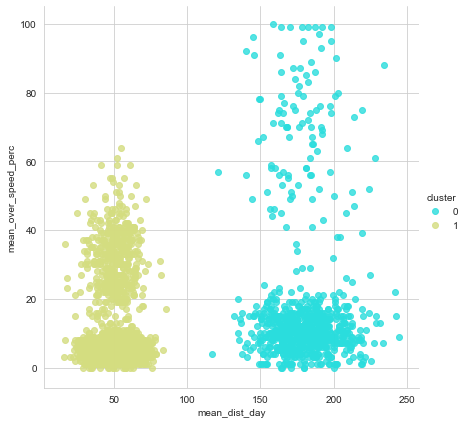

In [19]:
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=df_analyze, hue='cluster', palette='rainbow', size = 6, aspect=1, fit_reg=False)

In [20]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df.drop('id', axis =1))
print(kmeans_4.cluster_centers_)

[[ 49.99263253   5.20447169]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.40482436  32.36533958]]


In [21]:
unique, count = np.unique(kmeans_4.labels_, return_counts = True)

In [22]:
dict(zip(unique, count))

{0: 2773, 1: 696, 2: 104, 3: 427}

In [23]:
df_analyze['cluster'] = kmeans_4.labels_

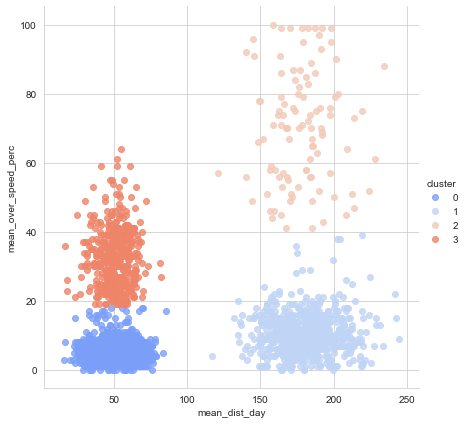

In [24]:
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=df_analyze, hue='cluster', palette='coolwarm', size = 6, aspect=1, fit_reg=False)

# Thank You 